## SF crime data analysis and modeling

### (https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry).

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
#fs: file system
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/yuxiaome/spark_sf/data/sf_03_18.csv")
display(dbutils.fs.ls("dbfs:/yuxiaome/spark_sf/data/"))

path,name,size
dbfs:/yuxiaome/spark_sf/data/sf_03_18.csv,sf_03_18.csv,550945238


In [0]:
data_path = "dbfs:/yuxiaome/spark_sf/data/sf_03_18.csv"
# use this file name later

### Solve  big data issues via Spark
approach 1: use Dataframe, register the RDD to a dataframe  
approach 2: use SQL

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \ #name of Spark Session 
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
18030800164070,180308001,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,04/25/2018,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.38854283127222,37.72878928885484,POINT (-122.38854283127222 37.72878928885484),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,2,null,null,null,null,86
18023216504170,180232165,04170,ASSAULT,FALSE IMPRISONMENT,Saturday,03/24/2018,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.41905269434928,37.75863240515618,POINT (-122.41905269434928 37.75863240515618),53,3,2,20,2,4,7,28859,19,13,null,15,3,15,null,2,null,null,3,null,53
16028516271000,160285162,71000,NON-CRIMINAL,LOST PROPERTY,Tuesday,03/01/2016,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.43195768519577,37.76493571896795,POINT (-122.43195768519577 37.76493571896795),38,3,5,5,15,4,5,28862,3,null,null,null,5,null,9,1,null,null,5,null,38


#### Q1 question (OLAP): 
Write a Spark program that counts the number of crimes for different category.

In [0]:
df_q1 = df_opt1.groupBy('category').count().orderBy('count', ascending = False)
display(df_q1)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
sql_q1 = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(sql_q1)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


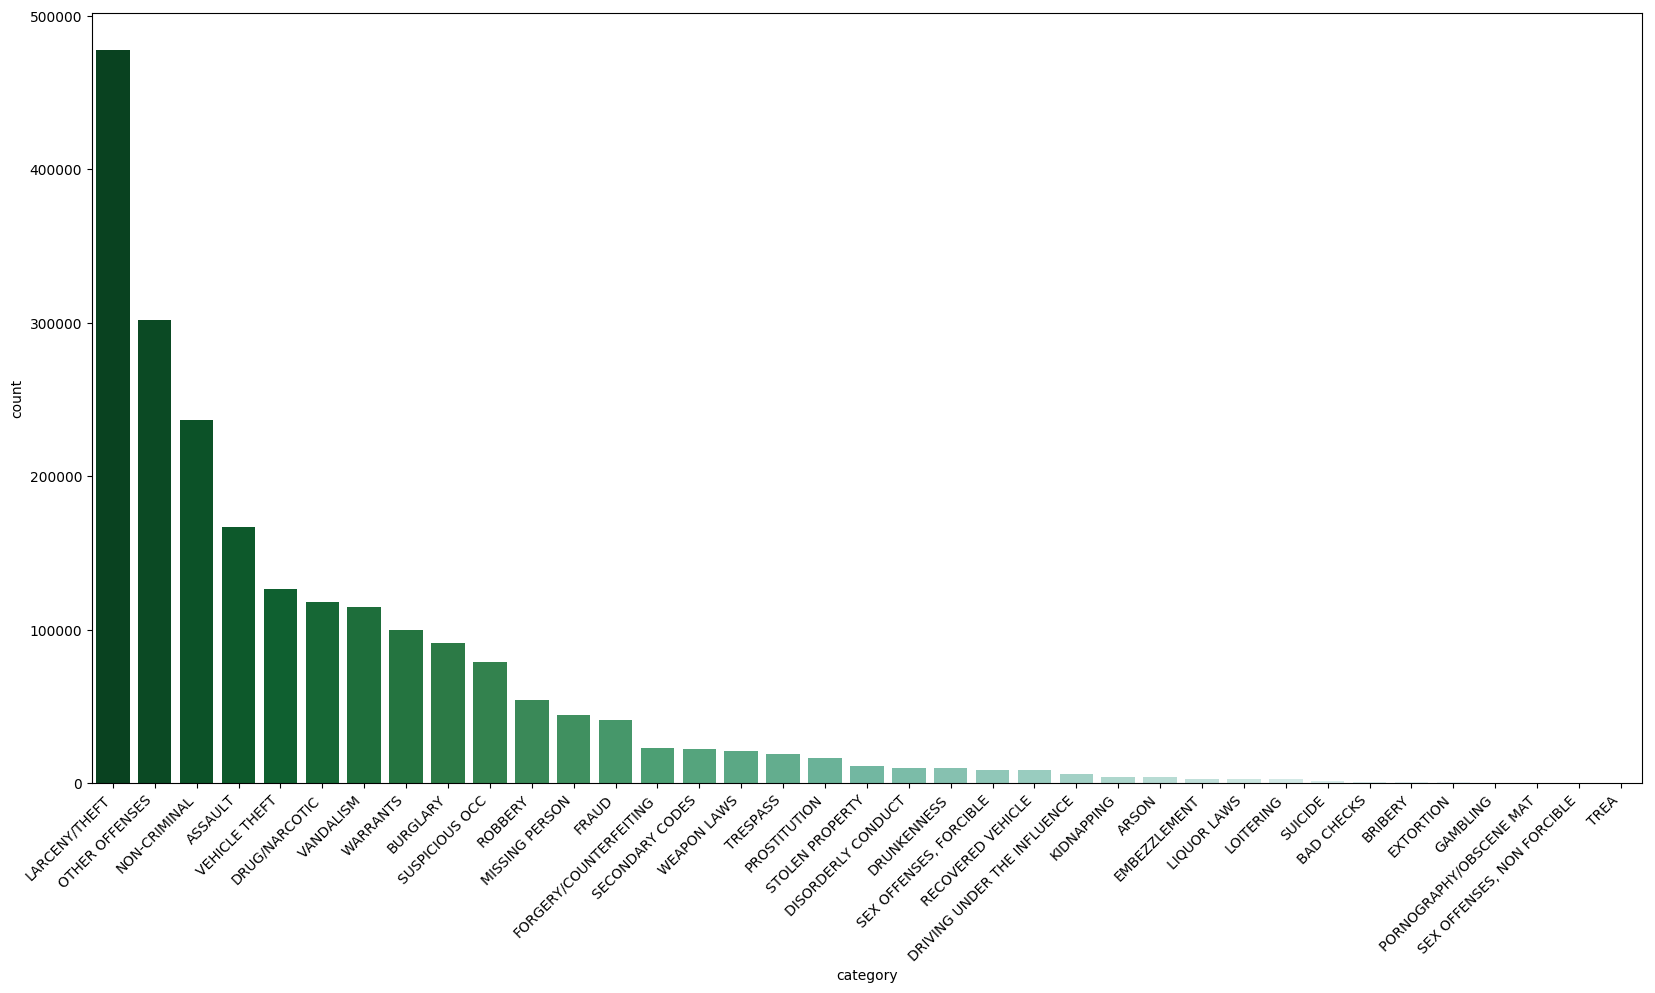

In [0]:
import seaborn as sns
fig_dims = (20,10)
fig = plt.subplots(figsize = fig_dims)
spark_df_q1_plot = df_q1.toPandas()
chart = sns.barplot(x = 'category', y = 'count', palette= 'BuGn_r', data = spark_df_q1_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
display(chart)

####Q1_Insight: According to the number of crimes, we can classify crime category into three groups based on the above-mentioned graphs and tables: high crime rate, medium crime rate, and low crime rate.

#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [0]:
#df way
df_q2 = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending = False)
display(df_q2)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
#sql way
sql_q2 = spark.sql("SELECT  PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(sql_q2)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


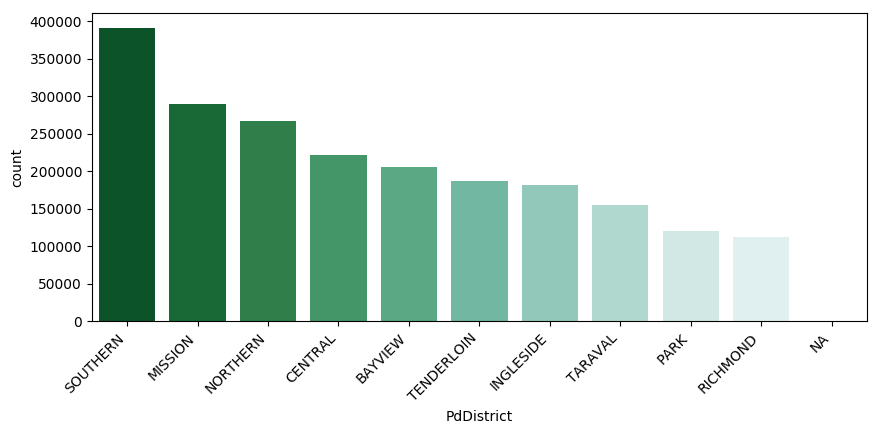

In [0]:
# Visualize Result
fig_dims = (10,4)
fig = plt.subplots(figsize = fig_dims)
spark_df_q2_plot = df_q2.toPandas()
chart = sns.barplot(x = 'PdDistrict', y = 'count', palette= 'BuGn_r',data = spark_df_q2_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment = 'right')
display(chart)

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown".   
hint 1: SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

hint 2: SF downtown 物理范围可以是 rectangle a < x < b  and c < y < d. thus, San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each. So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740). 也可以是中心一个圈，距离小于多少算做downtown

In [0]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90)
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603)
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123)
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449)
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459)
040378011,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191)
041476690,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507)
180308001,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,04/25/2018,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.38854283127222,37.72878928885484,POINT (-122.38854283127222 37.72878928885484)
180232165,ASSAULT,FALSE IMPRISONMENT,Saturday,03/24/2018,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.41905269434928,37.75863240515618,POINT (-122.41905269434928 37.75863240515618)
160285162,NON-CRIMINAL,LOST PROPERTY,Tuesday,03/01/2016,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.43195768519577,37.76493571896795,POINT (-122.43195768519577 37.76493571896795)


In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
display(df_new.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011


In [0]:
# df way
sf_downtown = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
df_q3 = df_new.filter((df_new.DayOfWeek == "Sunday") & (sf_downtown)).groupby('IncidentDate','DayOfWeek').count().orderBy('IncidentDate')
display(df_q3)

IncidentDate,DayOfWeek,count
2003-01-05,Sunday,13
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,12
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


In [0]:
#sql way
df_new.createOrReplaceTempView("sf_crime")
sql_q3 = spark.sql("SELECT IncidentDate, DayOfWeek, COUNT(*) AS Count FROM sf_crime WHERE DayOfWeek = 'Sunday' \
                          AND X > -122.4313 AND X < -122.4213 AND Y > 37.7540 AND Y < 37.7740 \
                          GROUP BY IncidentDate, DayOfWeek ORDER BY IncidentDate")
display(sql_q3)

IncidentDate,DayOfWeek,Count
2003-01-05,Sunday,13
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,12
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


In [0]:
display(spark_sql_q3)

IncidentDate,DayOfWeek,Count
2003-01-05,Sunday,13
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,12
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


In [0]:
def center(x,y):
    return ((float(x) + 122.4263)**2 + (float(y) - 37.7640)**2)**(1/2)
  
from pyspark.sql.types import FloatType
center_udf = udf(lambda x, y: center(x,y), FloatType())

df_opt2 = df_opt1.withColumn('distance', center_udf(df_opt1['X'], df_opt1['Y']))

df_opt2.createOrReplaceTempView("sf_crime_dis")

crimeSundayDowntown = spark.sql("SELECT DayOfWeek, Date, COUNT(*) AS count FROM sf_crime_dis WHERE distance < 0.01118033989 AND DayOfWeek = 'Sunday' GROUP BY DayOfWeek, date ORDER BY count DESC")

display(crimeSundayDowntown)

DayOfWeek,Date,count
Sunday,10/31/2004,80
Sunday,06/30/2013,80
Sunday,10/28/2012,78
Sunday,06/24/2012,76
Sunday,04/06/2014,74
Sunday,11/01/2015,71
Sunday,04/07/2013,67
Sunday,06/28/2015,67
Sunday,06/25/2017,66
Sunday,07/14/2013,65


#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
display(df_years.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
180308001,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,04/25/2018,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.38854283127222,37.72878928885484,POINT (-122.38854283127222 37.72878928885484),2018-04-25,4,2018
180232165,ASSAULT,FALSE IMPRISONMENT,Saturday,03/24/2018,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.41905269434928,37.75863240515618,POINT (-122.41905269434928 37.75863240515618),2018-03-24,3,2018
160285162,NON-CRIMINAL,LOST PROPERTY,Tuesday,03/01/2016,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.43195768519577,37.76493571896795,POINT (-122.43195768519577 37.76493571896795),2016-03-01,3,2016
171034934,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,12/22/2017,23:30,NORTHERN,NONE,800 Block of FELL ST,-122.4318568343798,37.77484995474678,POINT (-122.4318568343798 37.77484995474678),2017-12-22,12,2017
176096519,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Saturday,04/15/2017,00:45,NORTHERN,NONE,1900 Block of LOMBARD ST,-122.43362219642138,37.800270294430966,POINT (-122.43362219642138 37.800270294430966),2017-04-15,4,2017


In [0]:
#df way
df_q4 = df_years.groupby('Year', 'Month').count().orderBy('Year','Month')
display(df_q4)

Year,Month,count
2015,1,13181
2015,2,11882
2015,3,13463
2015,4,12526
2015,5,13318
2015,6,12853
2015,7,12949
2015,8,13317
2015,9,12476
2015,10,12697


In [0]:
%sql select distinct(category) as type, count(*) as Count, year from sf_crime where Year in (2015, 2016, 2017, 2018) group by 1,3 order by 2 desc

type,Count,year
LARCENY/THEFT,47714,2017
LARCENY/THEFT,41980,2015
LARCENY/THEFT,40365,2016
OTHER OFFENSES,20052,2015
OTHER OFFENSES,19337,2016
NON-CRIMINAL,19098,2015
OTHER OFFENSES,17890,2017
NON-CRIMINAL,17871,2016
NON-CRIMINAL,17328,2017
LARCENY/THEFT,13610,2018


#### Q4_Business Impact:
1. It is very obvious from the above figure that the crime rate from 2015 to 2017 is very high, especially the theft crime, and there has been a downward trend in 2018, especially in May.
2. The crime rate has been so high since 2015, it may be because of the 47th Act signed by the governor in the California referendum in 2014, which led to a large number of theft and robbery crimes.
3. Through online research, the reason for the decline in crime rate since 2018 may be that the San Francisco Police Department has increased uniformed police patrols, hence violence and theft activities have been greatly reduced. In addition, the San Francisco Police Department stepped up its crackdown on the drug trade, which is also one of the reasons for the decline in crime rate.

In [0]:
df_opt2.createOrReplaceTempView('sf_crime')
#sql way
sql_q4 = spark.sql(" SELECT SUBSTRING(Date,1,2) AS Month, SUBSTRING(Date,7,4) AS Year, COUNT(*) AS Count \
                       FROM sf_crime \
                       GROUP BY 1, 2 \
                       HAVING Year in (2015, 2016, 2017, 2018) \
                       ORDER BY Year, Month")
display(sql_q4)

Month,Year,Count
01,2015,13181
02,2015,11882
03,2015,13463
04,2015,12526
05,2015,13318
06,2015,12853
07,2015,12949
08,2015,13317
09,2015,12476
10,2015,12697


#### Q5 question (OLAP)
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
from pyspark.sql.functions import to_timestamp
# add new columns to convert Time to hour format
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'],'HH:mm')) 
# extract hour from incident time
df_new1 = df_new1.withColumn('Hour',hour(df_new1['IncidentTime']))
display(df_new1.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year,IncidentTime,Hour
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003,1970-01-01T10:00:00.000+0000,10
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005,1970-01-01T12:20:00.000+0000,12
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006,1970-01-01T00:55:00.000+0000,0
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007,1970-01-01T00:01:00.000+0000,0
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011,1970-01-01T11:00:00.000+0000,11


In [0]:
dates = ['12/15/2015','12/15/2016','12/15/2017']
df_days = df_new1[df_new1.Date.isin(dates)]
df_q5 = df_days.groupby('Hour','Date').count().orderBy('Date','Hour')
display(df_q5)

Hour,Date,count
0,12/15/2015,15
1,12/15/2015,6
2,12/15/2015,5
3,12/15/2015,4
4,12/15/2015,10
5,12/15/2015,3
6,12/15/2015,4
7,12/15/2015,8
8,12/15/2015,12
9,12/15/2015,10


#### Q5_Travel Suggestion
It can be clearly seen from the above figure that there are two peak periods of crime, 12 o'clock and 18 o'clock. This time period is the time for tourists to eat and rest. So remind visitors not to relax their vigilance while resting.

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

###### Step 1: Find out the top-3 danger district

In [0]:
#df way
df_q6_s1 = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False)
display(df_q6_s1)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
top3_danger = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False).head(3)
top3_danger_district = [top3_danger[i][0] for i in range(3)]
top3_danger_district

Out[ 11 ]: ['SOUTHERN', 'MISSION', 'NORTHERN']

In [0]:
top3District = spark.sql("SELECT PdDistrict, COUNT(*) AS count FROM hourtable GROUP BY PdDistrict ORDER BY count DESC")
display(top3District)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
#sql way
sql_q6_s1 = spark.sql( """
                       SELECT PdDistrict, COUNT(*) as Count
                       FROM sf_crime
                       GROUP BY 1
                       ORDER BY 2 DESC
                       LIMIT 3 
                       """ )
display(sql_q6_s1)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


###### Step 2: Find out the crime event w.r.t category and time (hour) from the result of step 1

In [0]:
# df way
df_q6_s2 = df_new1.filter(df_new1.PdDistrict.isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupby('Category','Hour').count().orderBy('Category','Hour')
display(df_q6_s2)

Category,Hour,count
ARSON,0,84
ARSON,1,77
ARSON,2,84
ARSON,3,95
ARSON,4,74
ARSON,5,60
ARSON,6,50
ARSON,7,28
ARSON,8,34
ARSON,9,28


#### Q6_Travel Suggestion

1. According to step1, the three most dangerous districts are SOUTHERN, MISSION and NORTHERN.
2. We can see from the picture above that among the top three dangerous streets, the crime rate around 5 am is the lowest, and the high incidence of crime rate is around 12pm and 18pm, especially pay attention to theft, so I recommend to increase police patrol during that periods.

#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
%sql select distinct(resolution) as resolve from sf_crime

resolve
EXCEPTIONAL CLEARANCE
"ARREST, BOOKED"
PROSECUTED FOR LESSER OFFENSE
LOCATED
UNFOUNDED
DISTRICT ATTORNEY REFUSES TO PROSECUTE
PSYCHOPATHIC CASE
COMPLAINANT REFUSES TO PROSECUTE
"ARREST, CITED"
PROSECUTED BY OUTSIDE AGENCY


In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window

resolution_func = udf (lambda x: x != 'NONE')
df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
df_q7 = df_q7.groupBy('category', 'Resolution', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
df_q7 = df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(df_q7.IsResolution == True).orderBy('percentage%', ascending=False)
display(df_q7)

category,Resolution,IsResolution,resolved,total,percentage%
WARRANTS,"ARREST, BOOKED",true,93092,99821,93.25893349094879
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",true,4941,5652,87.42038216560509
STOLEN PROPERTY,"ARREST, BOOKED",true,9693,11450,84.65502183406113
DRUG/NARCOTIC,"ARREST, BOOKED",true,97926,117821,83.11421563218781
DRUNKENNESS,"ARREST, BOOKED",true,7471,9760,76.54713114754098
LIQUOR LAWS,"ARREST, BOOKED",true,1839,2840,64.75352112676056
WEAPON LAWS,"ARREST, BOOKED",true,13334,21004,63.48314606741573
LOITERING,"ARREST, CITED",true,1432,2402,59.61698584512906
PROSTITUTION,"ARREST, CITED",true,9667,16501,58.584328222531965
BRIBERY,"ARREST, BOOKED",true,418,796,52.51256281407035


In [0]:
display(df_q7)

category,Resolution,IsResolution,resolved,total,percentage%
WARRANTS,"ARREST, BOOKED",true,93092,99821,93.25893349094879
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",true,4941,5652,87.42038216560509
STOLEN PROPERTY,"ARREST, BOOKED",true,9693,11450,84.65502183406113
DRUG/NARCOTIC,"ARREST, BOOKED",true,97926,117821,83.11421563218781
DRUNKENNESS,"ARREST, BOOKED",true,7471,9760,76.54713114754098
LIQUOR LAWS,"ARREST, BOOKED",true,1839,2840,64.75352112676056
WEAPON LAWS,"ARREST, BOOKED",true,13334,21004,63.48314606741573
LOITERING,"ARREST, CITED",true,1432,2402,59.61698584512906
PROSTITUTION,"ARREST, CITED",true,9667,16501,58.584328222531965
BRIBERY,"ARREST, BOOKED",true,418,796,52.51256281407035


#### Q7_Summary
1. The top four categories of crimes resolved are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC.
2. The categories which less than 10% of crimes resolved are RECOVERED VEHICLE, VEHICLE THEFT, and LARCENY/THEFT.
3. Can increase the police force against theft crimes.

### Conclusion.

By analyzing crime data in San Francisco using Spark SQL, I tried to give basic hints to the travellers and policemen about a big picture of when and how the number of crime would change in this city. I used mainly the DataFrame Structure with the help of SQL API to complete this task. I learned that the number of crime usually follows a trend with can be tracked, such as that the number of crime typically increases at noon, but this trend can only be captured by analyzing a huge amount of data, and Spark SQL is an ideal tool to handle this kind of big data.